In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Conhecendo o Dataset

In [ ]:
dataset = pd.read_csv('houses_prices.csv')
dataset.head(5)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [ ]:
# Sem dados nulos
dataset.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

#Análises Iniciais (Estatísticas Descritivas)

In [ ]:
dataset.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


# Separando variáveis explicativas de dependentes escolhidas para a análise

In [ ]:
Y = dataset.Prices
Y

0         43800
1         37550
2         49500
3         50075
4         52400
          ...  
499995    55900
499996    29250
499997    51350
499998    62725
499999    32150
Name: Prices, Length: 500000, dtype: int64

In [ ]:
dataset.corr()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.000000,-0.000897,0.000374,-0.000398,0.002525,-0.001477,-0.001047,-0.000776,-0.003455,0.000526,-0.000128,0.000114,-0.001230,0.000610,0.001428,0.147717
Garage,-0.000897,1.000000,0.001307,-0.003647,0.000541,0.001847,-0.002385,-0.000931,0.000793,0.001480,0.000779,-0.000562,-0.002171,0.001088,-0.000669,0.100294
FirePlace,0.000374,0.001307,1.000000,0.000643,0.000952,-0.000922,-0.000030,0.000185,-0.000211,-0.000309,0.001342,0.001818,-0.000366,0.001295,0.000231,0.089139
Baths,-0.000398,-0.003647,0.000643,1.000000,0.002493,-0.002739,0.000246,-0.000880,-0.000858,-0.000755,0.001047,-0.000687,-0.001668,0.002212,0.001723,0.145087
White Marble,0.002525,0.000541,0.000952,0.002493,1.000000,-0.498893,-0.500723,0.000078,-0.000861,-0.001583,0.000558,-0.000576,-0.000402,-0.001898,0.000959,0.448154
Black Marble,-0.001477,0.001847,-0.000922,-0.002739,-0.498893,1.000000,-0.500383,-0.000368,-0.000324,0.001764,-0.000549,0.000073,0.000086,0.000713,0.000133,-0.078049
Indian Marble,-0.001047,-0.002385,-0.000030,0.000246,-0.500723,-0.500383,1.000000,0.000289,0.001184,-0.000180,-0.000010,0.000503,0.000316,0.001184,-0.001091,-0.369756
Floors,-0.000776,-0.000931,0.000185,-0.000880,0.000078,-0.000368,0.000289,1.000000,-0.000641,-0.002651,0.000082,0.001373,-0.000008,-0.000211,-0.000492,0.619451
City,-0.003455,0.000793,-0.000211,-0.000858,-0.000861,-0.000324,0.001184,-0.000641,1.000000,0.000488,0.000788,-0.002716,0.000770,0.000322,0.001207,0.233259
Solar,0.000526,0.001480,-0.000309,-0.000755,-0.001583,0.001764,-0.000180,-0.002651,0.000488,1.000000,0.001883,0.000238,-0.000817,-0.000466,-0.004263,0.008429


In [ ]:
X = dataset[['Area','Floors', 'Fiber', 'Baths' , 'White Marble']]
X

,Area,Floors,Fiber,Baths,White Marble
0,164,0,1,2,0
1,84,1,0,4,0
2,190,0,1,4,1
3,75,1,1,4,0
4,148,1,0,2,1
...,...,...,...,...,...
499995,128,1,0,2,1
499996,30,0,1,5,0
499997,174,1,1,2,0
499998,121,1,1,5,0


# Analisando Comportamento da variável dependente com seaborn

In [ ]:
import seaborn as sns

Text(0.5, 0, 'Valor')

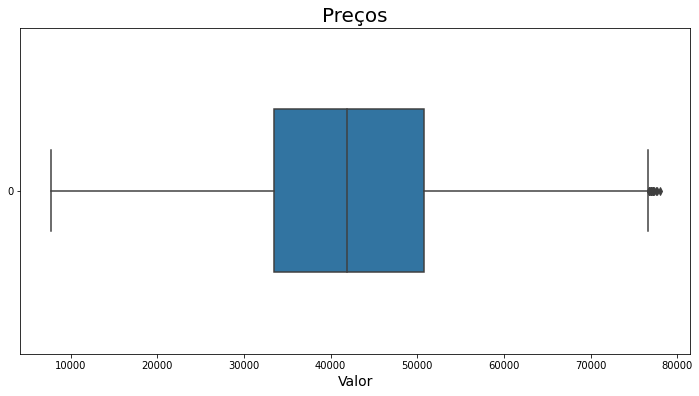

In [ ]:
ax = sns.boxplot(data=Y, orient = 'h', width=0.5)
ax.set_title('Preços', fontsize=20)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Valor', fontsize = 14)


Text(0.5, 0, 'Valor')

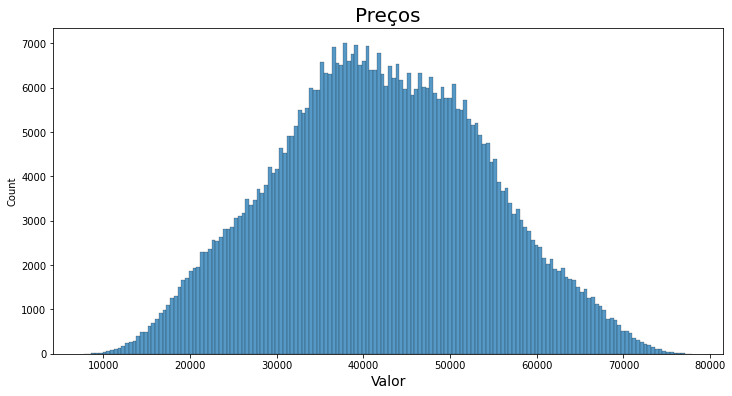

In [ ]:
# Nota-se que a variável dependente segue uma distribuição próxima à normal.
ax = sns.histplot(Y)
ax.set_title('Preços', fontsize=20)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Valor', fontsize = 14)

## Comparando a variável dependente com as explicativas


### Price X White Marble

Text(0, 0.5, 'White Marble')

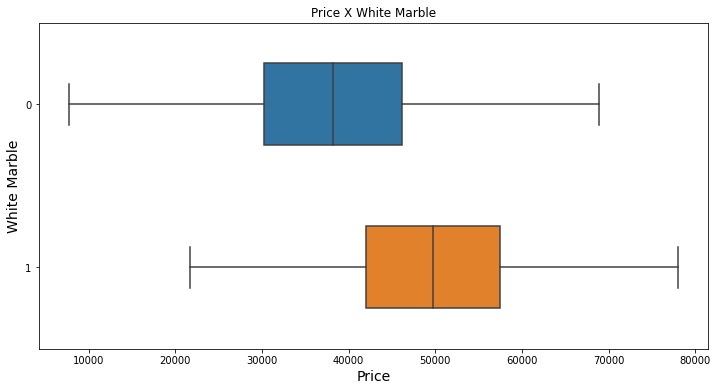

In [ ]:
ax = sns.boxplot(y = 'White Marble', x = 'Prices', data=dataset, orient = 'h', width=0.5)
ax.set_title('Price X White Marble')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Price', fontsize = 14)
ax.set_ylabel('White Marble', fontsize = 14)

### Price X Fiber

Text(0, 0.5, 'Fiber')

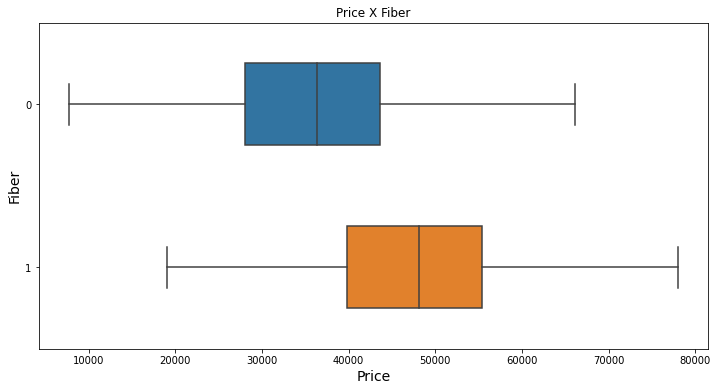

In [ ]:
ax = sns.boxplot(y = 'Fiber', x = 'Prices', data=dataset, orient = 'h', width=0.5)
ax.set_title('Price X Fiber')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Price', fontsize = 14)
ax.set_ylabel('Fiber', fontsize = 14)

Price X Floor

Text(0, 0.5, 'Floors')

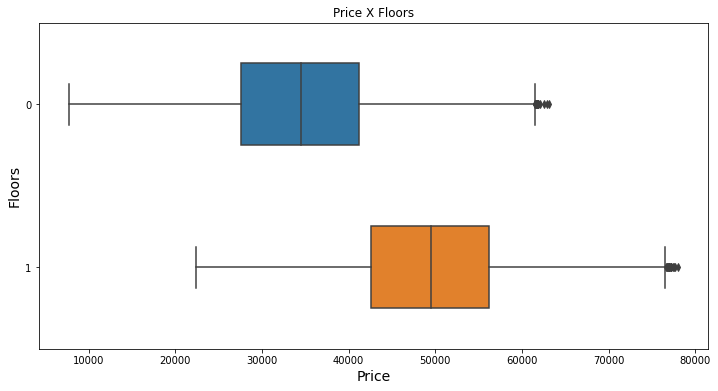

In [ ]:
ax = sns.boxplot(y = 'Floors', x = 'Prices', data=dataset, orient = 'h', width=0.5)
ax.set_title('Price X Floors')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Price', fontsize = 14)
ax.set_ylabel('Floors', fontsize = 14)

###Price X Baths


Text(0, 0.5, 'Baths')

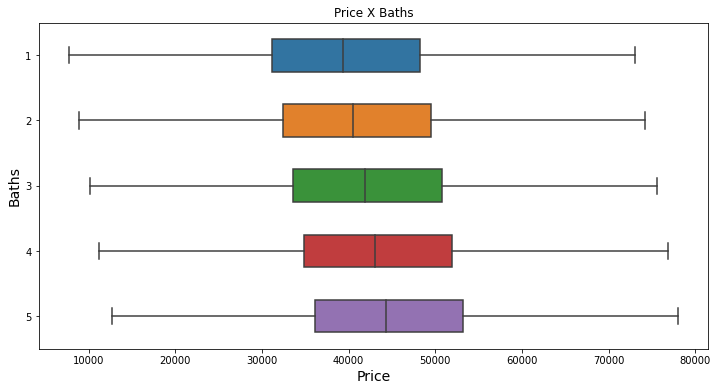

In [ ]:
ax = sns.boxplot(y = 'Baths', x = 'Prices', data=dataset, orient = 'h', width=0.5)
ax.set_title('Price X Baths')
ax.figure.set_size_inches(12,6)
ax.set_xlabel('Price', fontsize = 14)
ax.set_ylabel('Baths', fontsize = 14)

### Price X Area

In [ ]:
# ax = sns.pairplot(dataset, y_vars = 'Prices', x_vars=['Area'], kind='reg')
# ax.fig.suptitle("Dispersão entre as variaveis", fontsize = 20, y = 1.05)
# ax.figure.set_size_inches(20,6)

In [ ]:
# ax = sns.pairplot(dataset, y_vars = 'Prices', x_vars=['Floors', 'Fiber', 'Baths' , 'White Marble'], kind='reg')
# ax.fig.suptitle("Dispersão entre as variaveis", fontsize = 20, y = 1.05)
# ax.figure.set_size_inches(20,6)

#Estimando um Modelo de Regressão Linear

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2811)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(350000, 5)
(150000, 5)
(350000,)
(150000,)


###Importando Bibliotecas de modelos de regressão

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

###Treinando o modelo

In [ ]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

### Coeficiente de Determinação - R²

O quanto a linha de regressão ajusta-se aos dados.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.86


###Prevendo resultados

In [ ]:
y_predict = modelo.predict(X_test) 

In [ ]:
X_test[0:1]

,Area,Floors,Fiber,Baths,White Marble
188274,25,1,1,4,0


## Obtendo o coeficiente de determinação (R²) para as previsões do modelo


In [ ]:
print("R² = %s" % metrics.r2_score(y_test, y_predict).round(2))

R² = 0.86


## Criando um simulador de preços


In [ ]:
Area = 12
Floors = 0
Fiber = 0
Baths = 1
White_Marble = 0
entrada = [[Area, Floors, Fiber, Baths, White_Marble]]
modelo.predict(entrada)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([19574.79333917])

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
195,12,2,1,4,0,0,1,0,2,0,0,1,0,0,0,28800
328,12,2,3,2,0,0,1,1,1,1,0,0,0,0,0,27800
625,12,2,4,2,0,1,0,0,2,1,1,0,1,0,1,27750
695,12,1,2,1,0,0,1,1,3,0,1,0,0,0,0,32300
952,12,3,3,1,0,0,1,1,2,1,1,0,0,1,0,32800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497885,12,1,2,1,0,1,0,1,3,0,0,1,0,0,1,47800
497953,12,2,0,1,1,0,0,0,2,0,0,1,0,1,1,38300
498073,12,2,0,4,1,0,0,1,3,1,0,0,0,0,0,49050
498214,12,1,1,4,1,0,0,0,2,0,0,0,1,1,1,34000
